In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import xgboost
from xgboost import XGBClassifier

In [ ]:
def var_stats(source):

  # read the source to a dataframe
  source = pd.read_csv(source)

  # stats of source
  d = source.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).T
  d['miss'] = source.isnull().sum()
  d['missrate'] = d['miss']/len(source)

  # export an csv
  d.to_csv('source_sum.csv')

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [ ]:
def imp_rank(source, dataset, varinfo):

  # read the source to a dataframe
  source = pd.read_csv(source)

  X_train = pd.read_csv(dataset)
  y_train = X_train['y']
  X_train = X_train.drop(['Unnamed: 0', 'y'], axis=1)

  # merge source and dataset together
  data = source.merge(X_train, left_on = ['pol_id',	'year'], right_on = ['pol_id',	'year'], how='inner')

  # drop index, categorical
  var = data.drop(['pol_id','year','STATE','ZIP5','ZIP4'], axis=1)

  # impute NA with mean
  var = var.apply(lambda x: x.fillna(x.mean()))

  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 8)) 

  # RandomForest Check
  modelRF = RandomForestClassifier(n_jobs=-1)
  modelRF.fit(var, y_train)
  impRF = modelRF.feature_importances_
  #plt.subplot(1, 2, 1)
  #plot_feature_importance(impRF,var.columns,'RANDOM FOREST')
  # Plot cumulative importance
  
  axes[0].plot(range(1, len(impRF)+1), np.cumsum(impRF))
  axes[0].set_title("Cum_imp_Random Forest")
  

  # XGBoost Check
  modelXG = XGBClassifier()
  modelXG.fit(var, y_train)
  impXG = modelXG.feature_importances_
  #plt.subplot(1, 2, 1)
  #plot_feature_importance(impXG,var.columns,'XGBOOST')
  # Plot cumulative importance
  
  axes[1].plot(range(1, len(impXG)+1), np.cumsum(impXG))
  axes[1].set_title("Cum_imp_XGBoost")
  

  # DecisionTree Check
  modelDT = DecisionTreeClassifier()
  modelDT.fit(var, y_train)
  impDT = modelDT.feature_importances_
  #plt.subplot(1, 2, 1)
  #plot_feature_importance(impDT,var.columns,'DECISION TREES')
  # Plot cumulative importance
  
  axes[2].plot(range(1, len(impDT)+1), np.cumsum(impDT))
  axes[2].set_title("Cum_imp_Decision Trees")
  

  # Lasso coefficient
  modelLS = LogisticRegression(penalty='l1', solver='liblinear')
  modelLS.fit(var, y_train)
  impLS = modelLS.coef_
  #plot_feature_importance(impLS[0],var.columns,'LASSO REGRESSION')

  # append the information to varinfo
  s = pd.read_csv(varinfo)
  s = s.drop([0])
  s['RF_imp'] = impRF
  s['XGB_imp'] = impXG
  s['DT_imp'] = impDT
  s['Lasso_coe'] = impLS[0]
  s['LS_imp'] = (s['Lasso_coe'].abs())/(s['Lasso_coe'].abs().sum())

  

  s.to_csv('importance.csv')



In [ ]:
var_stats('C:/Users/94018/Documents/BA886-7/result_final.csv')

C:\Users\94018\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:44:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


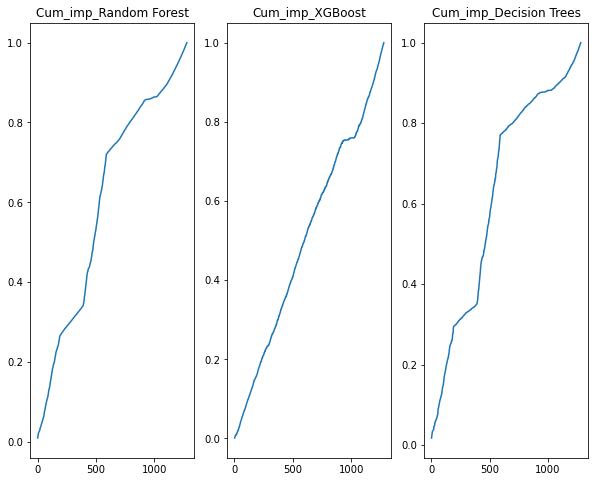

In [ ]:
imp_rank('C:/Users/94018/Documents/BA886-7/result_final.csv','C:/Users/94018/OneDrive/Documents/BA886-7/Data/id_Xtrain.csv','C:/Users/94018/Documents/BA886-7/source_sum.csv')

# test the models

In [ ]:
source1 = pd.read_csv('C:/Users/94018/Documents/BA886-7/result_final.csv')
X_train = pd.read_csv('C:/Users/94018/OneDrive/Documents/BA886-7/Data/id_Xtrain.csv')
y_train = X_train['y']
X_train = X_train.drop(['Unnamed: 0', 'y'], axis=1)
data1 = source1.merge(X_train, left_on = ['pol_id',	'year'], right_on = ['pol_id',	'year'], how='inner')
var = data1.drop(['pol_id','year','STATE','ZIP5','ZIP4'], axis=1)
var = var.apply(lambda x: x.fillna(x.mean()))

In [ ]:
var.head()

,Unnamed: 0,var0009,var0010,var0011,var0012,var0013,var0014,var0015,var0016,var0017,...,var1089,var1090,var1091,var1092,var1093,var1094,var1095,var1096,var1097,var1098
0,0,1.399841e+13,1.499801e+13,9.791195,1.209152,1.120664,2003.490935,1.18838,1.18838,1.137626,...,0.464817,0.005411,1.610939,0.017790,0.014483,529.444681,16.0833,1.565752,0.494665,1.875034
1,13,1.399841e+13,1.499801e+13,9.791195,1.209152,1.120664,2003.490935,1.18838,1.18838,1.137626,...,3.972740,0.000822,1.424492,0.017790,0.000812,525.395565,4.4583,1.565752,3.946720,1.994516
2,15,1.399841e+13,1.499801e+13,9.791195,1.209152,1.120664,2003.490935,1.18838,1.18838,1.137626,...,1.039131,0.006841,1.257027,0.017960,0.002827,337.546991,596.7080,0.957500,1.609646,0.472691
3,21,1.399841e+13,1.499801e+13,9.791195,1.209152,1.120664,2003.490935,1.18838,1.18838,1.137626,...,0.812861,0.000765,1.371218,0.008683,0.022483,425.409177,96.9999,0.359768,0.815174,1.368256
4,24,1.399841e+13,1.499801e+13,9.791195,1.209152,1.120664,2003.490935,1.18838,1.18838,1.137626,...,1.479692,0.001470,0.939906,0.020428,0.024574,269.405953,11.7501,1.565752,1.499447,0.471196


In [ ]:
X_test = pd.read_csv('C:/Users/94018/OneDrive/Documents/BA886-7/Data/id_Xtest.csv')
y_test = X_test['y']
X_test = X_test.drop(['Unnamed: 0', 'y'], axis=1)
data1_t = source1.merge(X_test, left_on = ['pol_id',	'year'], right_on = ['pol_id',	'year'], how='inner')
var_t = data1_t.drop(['pol_id','year','STATE','ZIP5','ZIP4'], axis=1)
var_t = var_t.apply(lambda x: x.fillna(x.mean()))

In [ ]:
var_t.head()

,Unnamed: 0,var0009,var0010,var0011,var0012,var0013,var0014,var0015,var0016,var0017,...,var1089,var1090,var1091,var1092,var1093,var1094,var1095,var1096,var1097,var1098
0,4,1.399841e+13,1.499801e+13,9.76744,1.200569,1.117144,2003.549814,1.187388,1.187388,1.136092,...,2.052881,0.002271,1.390553,0.019262,0.018343,363.864886,58.3333,1.856222,2.134286,1.020104
1,148,1.399811e+13,1.499711e+13,1.00000,1.705242,0.107922,2017.000000,1.587818,1.587818,1.395953,...,0.695146,0.004978,0.834543,0.005689,0.024879,420.688538,53.7918,1.534607,0.685446,1.638734
2,207,1.399811e+13,1.499711e+13,15.00000,1.705242,1.618828,1993.000000,1.587818,1.587818,1.395953,...,1.500188,0.004723,0.840432,0.003003,0.002378,415.607663,57.5831,2.026263,1.442561,0.753993
3,223,1.399811e+13,1.499711e+13,15.00000,1.705242,1.618828,1991.000000,1.587818,1.587818,1.395953,...,1.641251,0.004662,0.968284,0.008450,0.004516,427.479483,56.6667,1.176755,1.578286,1.222362
4,248,1.399811e+13,1.499711e+13,14.00000,1.705242,1.510906,2004.000000,1.587818,1.587818,1.395953,...,1.244375,0.004465,1.177163,0.003116,0.024879,415.587923,66.6667,0.887392,1.193542,1.638734


In [ ]:
# random forest
modelRF = RandomForestClassifier(n_jobs=-1)
modelRF.fit(var, y_train)
RF_pred = modelRF.predict(var_t)
print(accuracy_score(y_test, RF_pred))
print(classification_report(y_test, RF_pred))

0.9372702118788614
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     24767
           1       0.05      0.00      0.00      1616

    accuracy                           0.94     26383
   macro avg       0.49      0.50      0.49     26383
weighted avg       0.88      0.94      0.91     26383



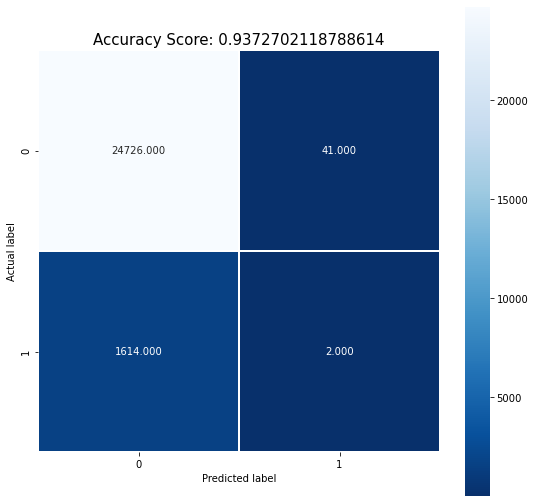

In [ ]:
score = accuracy_score(y_test, RF_pred)
cm = confusion_matrix(y_test, RF_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
# xgboost
modelXG = XGBClassifier()
modelXG.fit(var, y_train)
XG_pred = modelXG.predict(var_t)
print(accuracy_score(y_test, XG_pred))
print(classification_report(y_test, XG_pred))

C:\Users\94018\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9382177917598453
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     24767
           1       0.11      0.00      0.00      1616

    accuracy                           0.94     26383
   macro avg       0.52      0.50      0.49     26383
weighted avg       0.89      0.94      0.91     26383



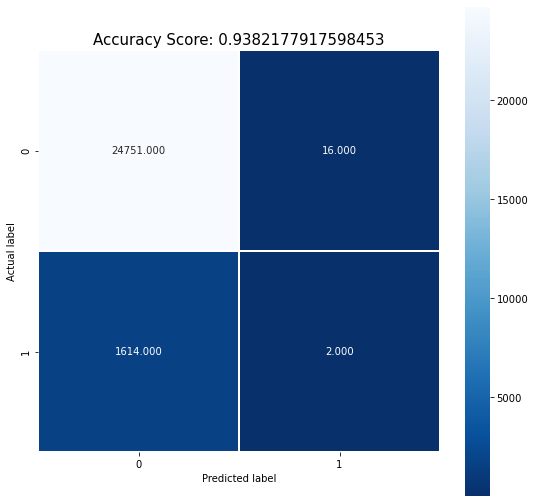

In [ ]:
score = accuracy_score(y_test, XG_pred)
cm = confusion_matrix(y_test, XG_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
# decision tree
modelDT = DecisionTreeClassifier()
modelDT.fit(var, y_train)
DT_pred = modelDT.predict(var_t)
print(accuracy_score(y_test, DT_pred))
print(classification_report(y_test, DT_pred))

0.864420270628814
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     24767
           1       0.06      0.09      0.07      1616

    accuracy                           0.86     26383
   macro avg       0.50      0.50      0.50     26383
weighted avg       0.89      0.86      0.87     26383



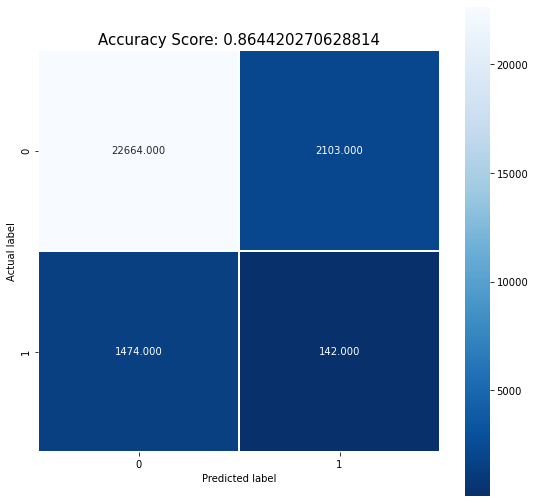

In [ ]:
score = accuracy_score(y_test, DT_pred)
cm = confusion_matrix(y_test, DT_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);